Full name: ***Moldir Koishybayeva*** <br>

<h2 align="center"> <font color=#4285F4><b><i>Mini Project</font></h4><br>

**Twitter API**, **NLP**, **EDA** 


**Installing tweepy package**

In [ ]:
from google.colab import output
!pip install tweepy
!pip install --upgrade nltk
output.clear()

**Importing Libraries**

In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import en_core_web_sm
nlp = en_core_web_sm.load()
nltk.download('popular')
output.clear()

**Data Scraping**

In [ ]:
consumer_key="cIZTtJsWBGVD9weyWdeWczqd0"
consumer_secret="o1fAQorvzZPtYEQREjCR3E7o3W5iXSeDrQxsfruV8evto3MIOO"
access_token="1450491630423838723-TOvHVfM0s8LGFVdsCJifsDucWkRLRC"
access_token_secret="o9V4y9dhBUlMV6kP0ND4k9gLoicgWt5iSnLvTcXIMgvbm"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
leaders=['BorisJohnson','RoyalFamily','POTUS','POTUS45','KremlinRussia_E']

In [ ]:
def get_tweets(username):
  cursor = tweepy.Cursor(api.user_timeline, id=username,tweet_mode="extended").items(3000)
  created_at=[]
  favorite_count=[]
  full_text=[]
  retweet_count=[]
  user_name=[]

  for i in cursor:
    created_at.append(i.created_at)
    favorite_count.append(i.favorite_count)
    full_text.append(i.full_text)
    retweet_count.append(i.retweet_count)
    user_name.append(i.user.name)

  df_tweets=pd.DataFrame({'data':created_at,'likes':favorite_count,'tweet':full_text,'retweet_count':retweet_count,'user':user_name})
  df_tweets_2020=df_tweets.loc[df_tweets['data'].dt.year == 2020]
  df_tweets_2021=df_tweets.loc[df_tweets['data'].dt.year == 2021]
  return df_tweets_2020,df_tweets_2021

**Needs Patience : executed in 2-3m -> scraping 15000 tweets overall and extracting by years 2020,2021**

In [ ]:
BorisJohnson=get_tweets(leaders[0])
RoyalFamily=get_tweets(leaders[1])
POTUS=get_tweets(leaders[2])
POTUS45=get_tweets(leaders[3])
KremlinRussia_E=get_tweets(leaders[4])

**Scraped all data, except 2020 for POTUS->President Biden created account on 2021-01-13**

In [ ]:
BorisJohnson[0]

,data,likes,tweet,retweet_count,user
902,2020-12-31 18:00:02,12943,There will be plenty who will be only too happ...,1717,Boris Johnson
903,2020-12-31 14:38:19,12458,I wholeheartedly welcome today’s political agr...,1267,Boris Johnson
904,2020-12-31 09:41:52,0,RT @10DowningStreet: 1 in 3 people who have CO...,306,Boris Johnson
905,2020-12-31 08:25:08,1453,The New Year #Honours2021 give us an opportuni...,177,Boris Johnson
906,2020-12-30 19:53:31,7159,Tonight I spoke to the incredible @UniofOxford...,643,Boris Johnson
...,...,...,...,...,...
1913,2020-01-08 18:15:54,5682,Today I met with @vonderleyen. When we leave t...,902,Boris Johnson
1914,2020-01-07 07:52:59,0,RT @10DowningStreet: “Wishing everyone celebra...,441,Boris Johnson
1915,2020-01-06 21:24:28,23939,Our hearts go out to all those in Australia af...,2760,Boris Johnson
1916,2020-01-02 10:18:00,66553,This is going to be a fantastic year for Brita...,31152,Boris Johnson


**Preprocessing**

**POTUS[0] -> tweets from 2020, POTUS[1] -> tweets from 2021**

In [ ]:
def tokenize(df_2020,df_2021):
  def preprocess(df_needed):
    tweets=''.join(df_needed['tweet'].tolist())
    tweets=regex.sub(r"[^a-zA-Z0-9]+"," ",tweets)  #removing special characters and digits
    tweets=regex.sub(r"RT[\s]+"," ",tweets)   #removing retweets
    tweets=regex.sub(r"http\S+", "",tweets)     #removing https://
    lst_tokens=nltk.word_tokenize(tweets)     #using word tokenizer
    lst_tokens=[token for token in lst_tokens if not token.lower() in stopwords.words('english')]  #removing English stop words
    lemmatizer=WordNetLemmatizer()
    tweets_data=[]
    for word in lst_tokens:
      tweets_data.append(lemmatizer.lemmatize(word))
    return tweets_data
  return preprocess(df_2020),preprocess(df_2021)

BorisJohnson_tokens=tokenize(BorisJohnson[0],BorisJohnson[1])
RoyalFamily_tokens=tokenize(RoyalFamily[0],RoyalFamily[1])
POTUS_tokens=tokenize(POTUS[0],POTUS[1])
POTUS45_tokens=tokenize(POTUS45[0],POTUS45[1])
KremlinRussia_E_tokens=tokenize(KremlinRussia_E[0],KremlinRussia_E[1])

**Interesting observation:** <br> @POTUS -> **President Biden** has no tweets in **2020** -> since he created an account in 2021<br> @POTUS45 ->**President Trump** has no tweets in **2021** -> blocked


In [ ]:
print('The length of tweets of President Biden in 2020:',len(POTUS_tokens[0]))
print('The length of tweets of President Trump in 2021:',len(POTUS45_tokens[1]))

The length of tweets of President Biden in 2020: 0
The length of tweets of President Trump in 2021: 0


**Visualization**

**WordCloud**

Frequently Used Words of Boris Johnson


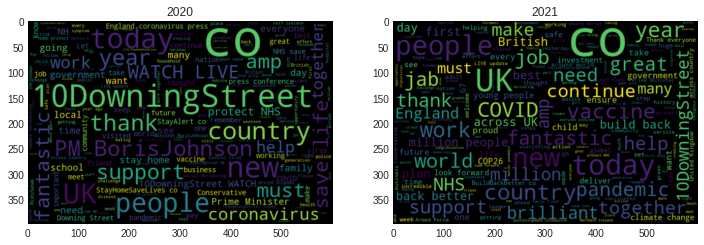

In [ ]:
print('\033[1m'+"Frequently Used Words of Boris Johnson"+'\033[0m')
fig,(ax,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(12,12))
BorisJohnson_str_2020=' '.join(BorisJohnson_tokens[0])
BorisJohnson_str_2021=' '.join(BorisJohnson_tokens[1])
ax=plt.subplot(121)
ax.title.set_text('2020')
wordCloud_vis_2020=WordCloud(width=600, height=400, random_state=42,max_font_size=100).generate(BorisJohnson_str_2020)
plt.imshow(wordCloud_vis_2020,interpolation='bilinear')
ax2=plt.subplot(122)
wordCloud_vis_2021=WordCloud(width=600, height=400, random_state=42,max_font_size=100).generate(BorisJohnson_str_2021)
ax2.title.set_text('2021')
plt.imshow(wordCloud_vis_2021,interpolation='bilinear')
plt.show()

**Horizontal Bar Graph**

In [ ]:
df_all=[BorisJohnson_tokens,RoyalFamily_tokens,POTUS_tokens,POTUS45_tokens,KremlinRussia_E_tokens]

In [ ]:
def values(df_leader_2020,df_leader_2021):
  df_2020=(pd.DataFrame(df_leader_2020)).value_counts()
  df_2021=(pd.DataFrame(df_leader_2021)).value_counts()
  return df_2020,df_2021

BorisJohnson_df=values(df_all[0][0],df_all[0][1])
RoyalFamily_df=values(df_all[1][0],df_all[1][1])
POTUS_df=values(df_all[2][0],df_all[2][1])
POTUS45_df=values(df_all[3][0],df_all[3][1])
KremlinRussia_E_df=values(df_all[4][0],df_all[4][1])

In [ ]:
def visualize_most_fr_word(df,df2,leader):
  fig,(ax,ax2) = plt.subplots(ncols=2,sharey=True)
  fig.suptitle('Frequently Used Words of '+leader,fontsize=13,color='black',horizontalalignment='right')
  ax=plt.subplot(121)
  ax.title.set_text('2020')
  df[:20,].plot(kind='barh')
  ax2=plt.subplot(122)
  ax2.title.set_text('2021')
  df2[:20,].plot(kind='barh')
  plt.style.use('seaborn-dark')
  ax.grid(True)
  ax2.grid(True)
  plt.subplots_adjust(left=-0.4)
  plt.show()

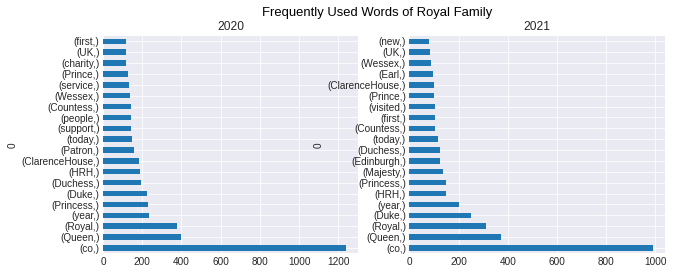

In [ ]:
visualize_most_fr_word(RoyalFamily_df[0],RoyalFamily_df[1],'Royal Family')

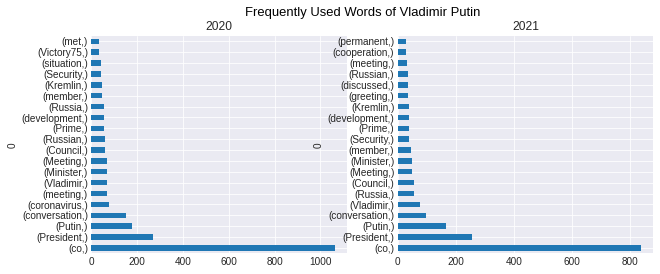

In [ ]:
visualize_most_fr_word(KremlinRussia_E_df[0],KremlinRussia_E_df[1],'Vladimir Putin')

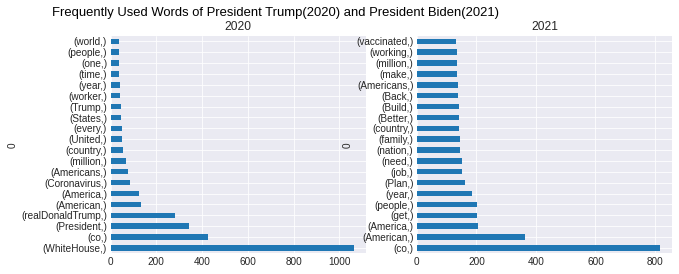

In [ ]:
visualize_most_fr_word(POTUS45_df[0],POTUS_df[1],'President Trump(2020) and President Biden(2021)')

**Top Mentioned People**

In [ ]:
def top_people_mentioned(str_tokens,leader,year):
  str_words = nlp(''.join(str(str_tokens)))
  label = [(X.text, X.label_) for X in str_words.ents]
  df = pd.DataFrame(label, columns = ['Word','Entity'])
  df_org = df.where(df['Entity'] == 'PERSON')
  df_org = df_org['Word'].value_counts()
  fig=plt.figure()
  df_org[:10].plot(kind='bar',rot=45,grid=True,color=['#1818F4','#3636FF','#5B5BFF','#6A6AFF','#7A7AFF','#8B8BFF','#6EB8F4'],fontsize=12,edgecolor='black').set_facecolor('#262626')
  fig.suptitle('Top 10 Mentioned Personas by '+leader+' in '+year,fontweight='bold')

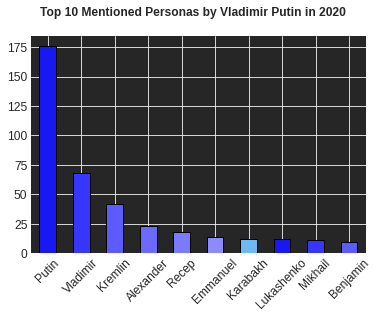

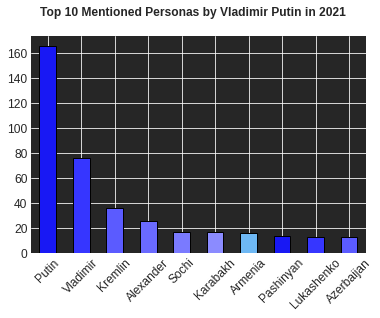

In [ ]:
top_people_mentioned(KremlinRussia_E_tokens[0],'Vladimir Putin','2020')
top_people_mentioned(KremlinRussia_E_tokens[1],'Vladimir Putin','2021')

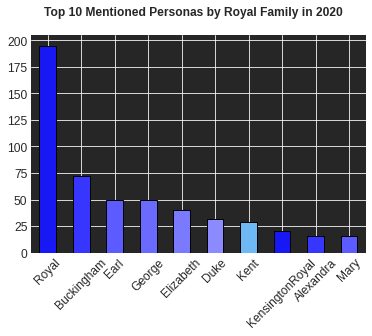

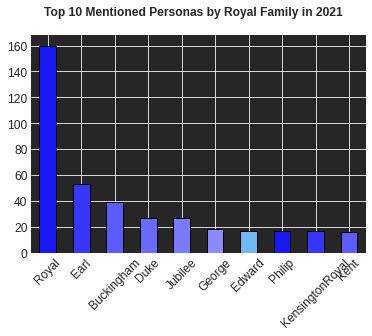

In [ ]:
top_people_mentioned(RoyalFamily_tokens[0],'Royal Family','2020')
top_people_mentioned(RoyalFamily_tokens[1],'Royal Family','2021')

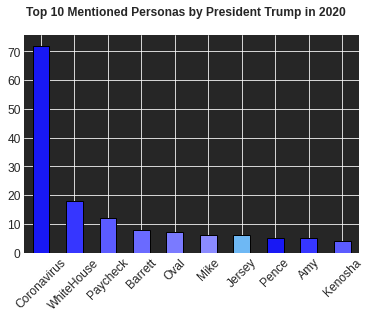

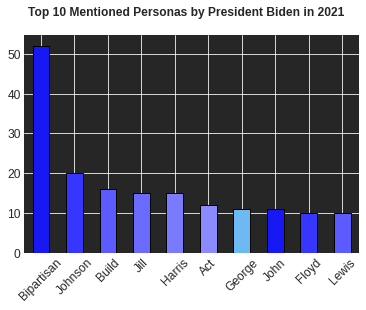

In [ ]:
top_people_mentioned(POTUS45_tokens[0],'President Trump','2020')
top_people_mentioned(POTUS_tokens[1],'President Biden','2021')

**Comparing Accounts**

In [ ]:
def get_data_leaders(leaders):
  id=[]
  full_name=[]
  location=[]
  followers_count=[]
  friends_count=[]
  created_at=[]
  statuses_count=[]
  username=[]

  for x in range(len(leaders)):
    cursor = tweepy.Cursor(api.user_timeline, id=leaders[x],tweet_mode="extended").items(1)
    for i in cursor:
      id.append(i.user.id)
      username.append(i.user.screen_name)
      full_name.append(i.user.name)
      location.append(i.user.location)
      followers_count.append(i.user.followers_count)
      friends_count.append(i.user.friends_count)
      created_at.append(i.user.created_at)
      statuses_count.append(i.user.statuses_count)

  data=pd.DataFrame({'id':id,'username':username, 'full name':full_name,'location':location,'followers':followers_count,'friends':friends_count,'created date':created_at,'number of tweets':statuses_count})
  return data

data=get_data_leaders(leaders)

In [ ]:
data

,id,username,full name,location,followers,friends,created date,number of tweets
0,3131144855,BorisJohnson,Boris Johnson,United Kingdom,3665936,459,2015-04-01 20:15:49,5046
1,36042554,RoyalFamily,The Royal Family,United Kingdom,4637862,459,2009-04-28 11:31:02,35573
2,1349149096909668363,POTUS,President Biden,,14592518,12,2021-01-13 00:37:08,1764
3,822215679726100480,POTUS45,President Trump 45 Archived,,32653326,37,2017-01-19 22:54:28,11009
4,205622130,KremlinRussia_E,President of Russia,"Moscow, Russian Federation",976087,22,2010-10-21 08:06:17,8926


In [ ]:
data_new=data.drop(['id','username','full name','location','created date'],axis=1)
df=pd.DataFrame(data=data_new.to_dict('records'),index=leaders,columns=['followers','friends','number of tweets'])
df

,followers,friends,number of tweets
BorisJohnson,3665936,459,5046
RoyalFamily,4637862,459,35573
POTUS,14592518,12,1764
POTUS45,32653326,37,11009
KremlinRussia_E,976087,22,8926


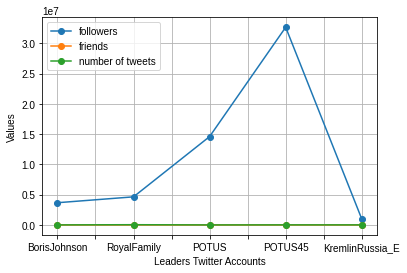

<Figure size 720x360 with 0 Axes>

In [ ]:
df.plot(kind='line',marker='o')
plt.style.use('seaborn-dark')
plt.xlabel('Leaders Twitter Accounts')
plt.ylabel('Values')
plt.grid(True)
plt.figure(figsize=(10,5))
plt.show()